# PCAをスクラッチで実装してみよう

In [3]:
import numpy as np
import pandas as pd
# sample data
x = np.array([3, 4, 2, 3, 4, 4, 3])
y = np.array([2, 3, 5, 5, 3, 2, 3])
X = pd.DataFrame({'x':x, 'y': y})

In [4]:
def my_pca(X, num_components):
    # step1, 標準化
    

IndentationError: expected an indented block (340390343.py, line 3)

# PCAで次元圧縮する

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit_transform(X)


array([[-0.49467432],
       [-0.89576549],
       [ 2.34350404],
       [ 1.33314107],
       [-0.89576549],
       [-1.50503729],
       [ 0.11459748]])

<AxesSubplot:xlabel='first component', ylabel='second component'>

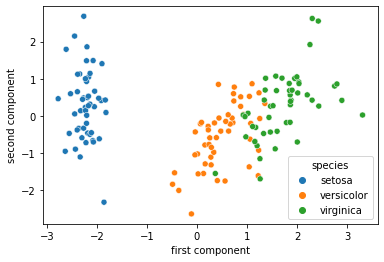

In [20]:
# でーた準備
import seaborn as sns
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=y_col)
y = df[y_col]

#今回はPCAをつかってデータの可視化を行いたいだけなのでhold-outは行わない
# 標準化
X_scaled = StandardScaler().fit_transform(X)

#PCA
X_pc = PCA(n_components=2).fit_transform(X_scaled)

#DataFeame化する
df_pc = pd.DataFrame(np.concatenate([X_pc,y.values.reshape(-1,1)], axis=1), columns=['first component', 'second component', 'species'])

#,視覚化　
sns.scatterplot(x='first component', y='second component', hue='species', data=df_pc)

# 累積寄与率の視覚化

Text(0, 0.5, 'cumlative explained variance')

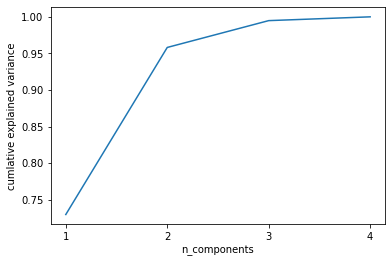

In [43]:
# データ準備
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

#標準化
X_scaled = StandardScaler().fit_transform(X)

#PCA
X_pc = PCA(n_components=4).fit(X_scaled)

#DataFrame化
# df_pc = pd.DataFrame(np.concatenate([X_pc, y.values.reshape(-1, 1)], axis=1), columns=['first_component', 'second_component','third_component', 'forth_component', 'species'])
# sns.scatterplot(x='first_component', y='second_component', hue='species', data=df_pc)

plt.plot(range(1,5), np.cumsum(X_pc.explained_variance_ratio_))
plt.xticks(range(1,5))
plt.xlabel('n_components')
plt.ylabel('cumlative explained variance')

# PCAをmnistでやってみる　　時間めっちゃかかるから注意

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

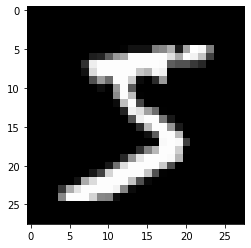

In [15]:
# 画像の再構成
im = mnist.data.loc[0].values.reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(im, 'gray')

In [20]:
# hold out 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=0)
from sklearn.decomposition import PCA
model = PCA(n_components=)

In [21]:
#標準化 PCAの前に必ず必要
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# PCAで次元削減
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95).fit(X_train)

In [25]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
X_train_pca.shape

(49000, 323)

In [28]:
#　ロジスティック回帰
from sklearn.linear_model import LogisticRegression
import time
model_pca = LogisticRegression()
before = time.time()
model_pca.fit(X_train_pca, y_train)
after = time.time()
print(f'fit took{after-before:.2f}s')

fit took180.98s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
y_pred_pc = model_pca.predict(X_test_pca)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_pc)

0.9195238095238095